<a href="https://colab.research.google.com/github/rodrigosimoncalaca/projectDataScience/blob/master/Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://www.rumo.com.br/lojas/00036391/images/20200310/logo.png" height="220px"></center>

# Entendendo o que é o Airbnb

O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando, hospedaram três viajantes que procuravam um lugar para ficar. Com isso viram a necessidade de criar um aplicativo onde milhões de anfitriões e viajantes podem anunciar seu espaço e reservar acomodações únicas em qualquer lugar do mundo. 

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

**Curiosidade:** Em 2018 eles já haviam hospedado mais de 300 milhões de pesoas ao redor de todo o mundo.

# Analisando Dados do Airbnb - Rio de Janeiro

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-07-15/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Copacabana', 'Ipanema', 'Humaitá', 'Barra da Tijuca', 'Flamengo',
       'Leblon', 'Santa Teresa', 'Itanhangá', 'Centro', 'Gávea',
       'Laranjeiras', 'Botafogo', 'Recreio dos Bandeirantes',
       'Santo Cristo', 'Glória', 'São Conrado', 'São Cristóvão',
       'Praça Seca', 'Maracanã', 'Tijuca', 'Lagoa',
       'São Francisco Xavier', 'Catete', 'Campo Grande',
       'Praia da Bandeira', 'Cacuia', 'Jacarepaguá', 'Vidigal',
       'Marechal Hermes', 'Jardim Botânico', 'Catumbi', 'Vargem Grande',
       'Senador Camará', 'Irajá', 'Cosme Velho', 'Leme', 'Vila da Penha',
       'Anil', 'Vargem Pequena', 'Estácio', 'Grajaú', 'Gardênia Azul',
       'Taquara', 'Bangu', 'Alto da Boa Vista', 'Urca', 'Guaratiba',
       'Joá', 'Penha Circular', 'Jardim Sulacap', 'Rio Comprido',
       'Praça da Bandeira', 'Encantado', 'Vila Isabel', 'Camorim',
       'Lins de Vasconcelos', 'Cosmos', 'Santíssimo', 'Gamboa',
       'Bonsucesso', 'Piedade', 'Olaria', 'Vila Valqueire',
       'Cidade de

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 35451
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.464641
last_review                       0.464641
name                              0.001862
host_name                         0.001692
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

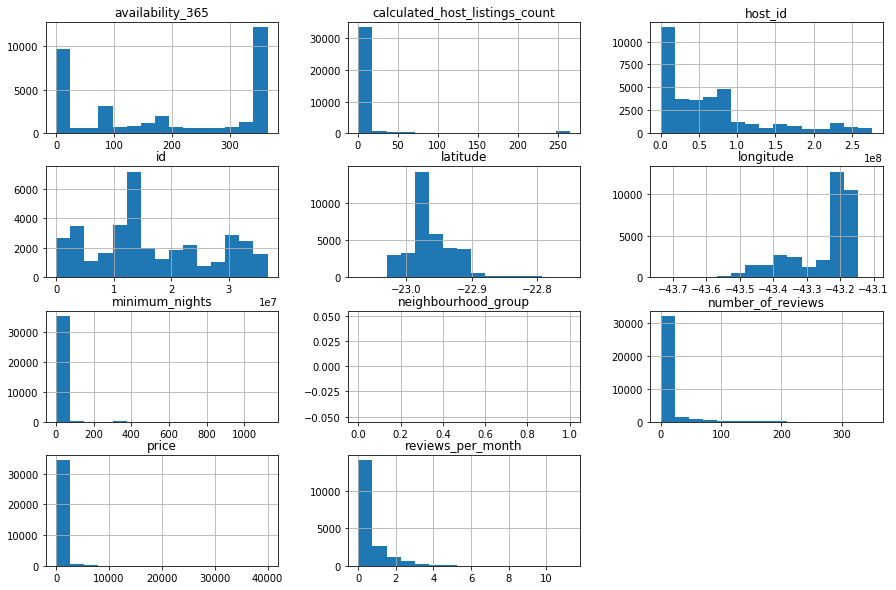

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35451.000000,35451.000000,35451.000000,18979.000000,35451.000000,35451.000000
mean,622.242222,4.735833,7.951962,0.607775,7.884827,190.142648
std,1588.131281,21.958524,22.308053,0.849336,32.626366,151.889963
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,281.000000,2.000000,1.000000,0.230000,1.000000,179.000000
75%,599.000000,4.000000,5.000000,0.790000,2.000000,362.000000
max,40000.000000,1123.000000,350.000000,11.250000,265.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 599, porém seu valor máximo é 40000.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights


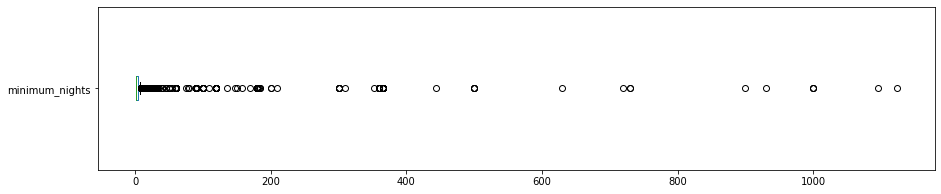

minimum_nights: valores acima de 30:
223 entradas
0.6290%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

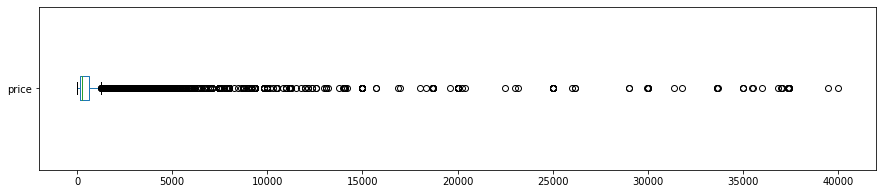


price: valores acima de 1500
2528 entradas
7.1310%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

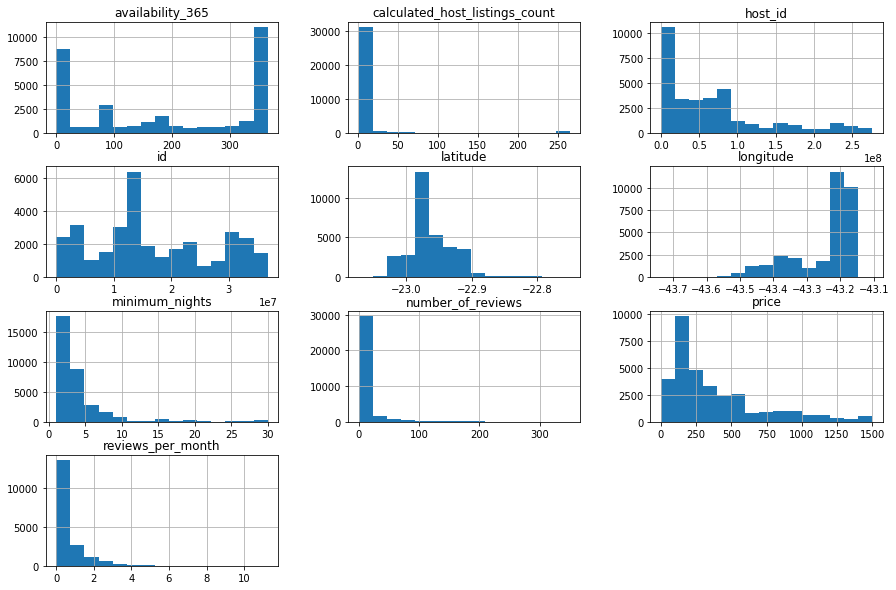

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.188616,-0.163380,-0.174879,-0.016570,-0.029689
minimum_nights,0.188616,1.000000,-0.082348,-0.115913,-0.041314,-0.026565
number_of_reviews,-0.163380,-0.082348,1.000000,0.627838,-0.036764,0.012013
reviews_per_month,-0.174879,-0.115913,0.627838,1.000000,-0.019302,-0.048064
calculated_host_listings_count,-0.016570,-0.041314,-0.036764,-0.019302,1.000000,0.073542
availability_365,-0.029689,-0.026565,0.012013,-0.048064,0.073542,1.000000


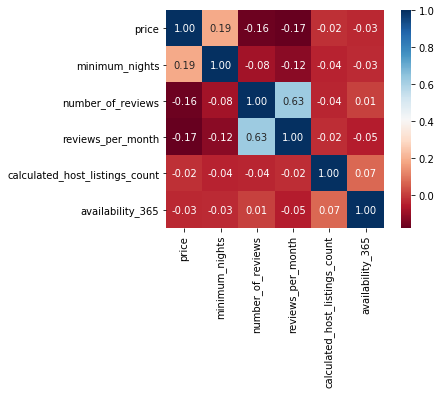

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22491
Private room        9404
Shared room          842
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.687021
Private room       0.287259
Shared room        0.025720
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  967.000000
Anchieta                  633.200000
Ricardo de Albuquerque    605.750000
Jacarepaguá               528.572654
Complexo do Alemão        518.750000
Vicente de Carvalho       505.000000
Barra da Tijuca           503.296127
Maracanã                  485.982993
Lagoa                     481.692098
Leblon                    475.864206
Name: price, dtype: float64

Acima, vemos que a comunidade Complexo do Alemão está com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Complexo do Alemão.

In [0]:
# ver quantidade de imóveis no Complexo do Alemão
print(df[df.neighbourhood == "Complexo do Alemão"].shape)

# ver as 4 entradas do Complexo do Alemão
df[df.neighbourhood == "Complexo do Alemão"]

(4, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12438,12253055,Triplex House for Olympic Games,65969079,Andrea,NaN,Complexo do Alemão,-22.85729,-43.26518,Entire home/apt,1398,3,0,NaN,NaN,1,0
21543,17148972,Casa Brota,101966262,Thamyra,NaN,Complexo do Alemão,-22.85692,-43.27611,Private room,41,1,6,2018-10-07,0.21,1,89
23723,21090668,Be a Carioca in our Guesthouse,10459831,Ozomatli,NaN,Complexo do Alemão,-22.86792,-43.27700,Shared room,37,1,3,2018-03-07,0.17,4,88
24008,21448656,Casa 1 quarto alem,155642978,Felipe,NaN,Complexo do Alemão,-22.85954,-43.27623,Shared room,599,1,1,2017-11-28,0.05,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

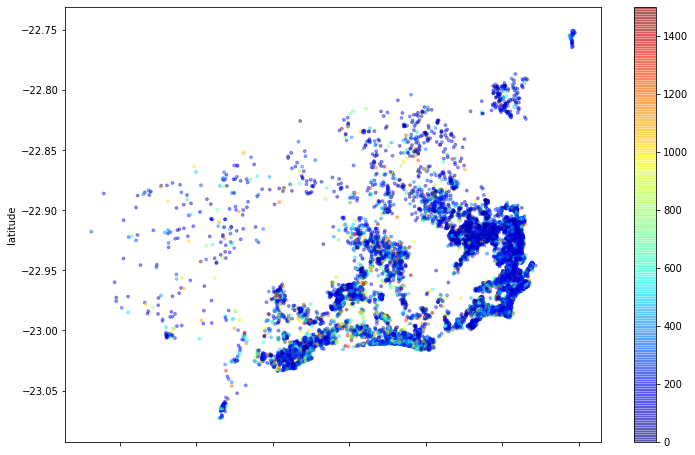

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.